## Solutions (DAY 3)

## K-Means Clustering

In [ ]:
# Make a cluster following the example on the pggm dataset using variables of GICS_Sector and Price_USD variable

#### Methodology
<ol>
<li> Import the data and investigate the number of unique classes of GiSC_Sector.
<li> Re-encode the Gisc-sector variable to numerical classes and save as a new colum called sector
<li> Display the elbow method plot.
<li> Display the Clustering plot.
</ol>

What do you notice on the elbow plot? Any comments on the clustering plot?

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Location of dataset
url = 'http://bit.ly/PGGM_dataset'

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url)

In [70]:
irisdata['GICS_Sector'].unique()

array(['Industrials', 'Utilities', 'Information Technology',
       'Health Care', 'Financials', 'Consumer Staples',
       'Consumer Discretionary', 'Materials', 'Energy',
       'Communication Services', 'Real Estate'], dtype=object)

In [71]:
from sklearn import preprocessing 

print("Samples: {}, Features: {}".format(*irisdata.shape))
 
le = preprocessing.LabelEncoder()
temp = irisdata['GICS_Sector']

le.fit(temp)
irisdata['Sector'] = le.transform(temp)#temp.apply(le.fit_transform)
irisdata.head()

Samples: 38304, Features: 18


,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,GICS_Ind_Grp,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth,Sector
0,17290810,Cintas Corporation,12/31/2014,20141231,CTAS-US,-2.517855,-0.121111,4.156041,0.000402,Industrials,Commercial & Professional Services,7761.120,78.44,0.044387,9.089989,0.246962,0.042708,4.718765,6
1,80589M10,SCANA Corporation,12/31/2014,20141231,SCG-US,2.036428,6.307948,-8.426744,0.000422,Utilities,Utilities,8151.001,60.40,0.061397,3.472852,0.572871,0.062748,-0.949881,10
2,50241310,L-3 Communications Holdings Inc.,12/31/2014,20141231,LLL-US,-0.396162,-1.283580,-0.753021,0.000563,Industrials,Capital Goods,10883.341,126.21,0.060554,4.744629,0.570099,0.059821,-4.316938,6
3,91301710,United Technologies Corporation,12/31/2014,20141231,UTX-US,-1.973909,1.669562,1.815629,0.005174,Industrials,Capital Goods,99942.990,115.00,0.062889,6.805052,0.325584,0.059088,3.083364,6
4,92939U10,Wisconsin Energy Corporation,12/31/2014,20141231,WEC-US,1.118696,7.679176,-6.160975,0.000616,Utilities,Utilities,11893.872,52.74,0.051359,4.201019,0.369798,0.050815,1.421392,10


In [72]:
X = irisdata.iloc[:, [12, 8]].values

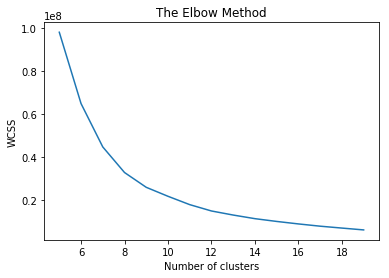

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(5, 20):
    kmeans = KMeans(n_clusters = i, random_state = 32)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(5, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 12, random_state = 32)
y_kmeans = kmeans.fit_predict(X)

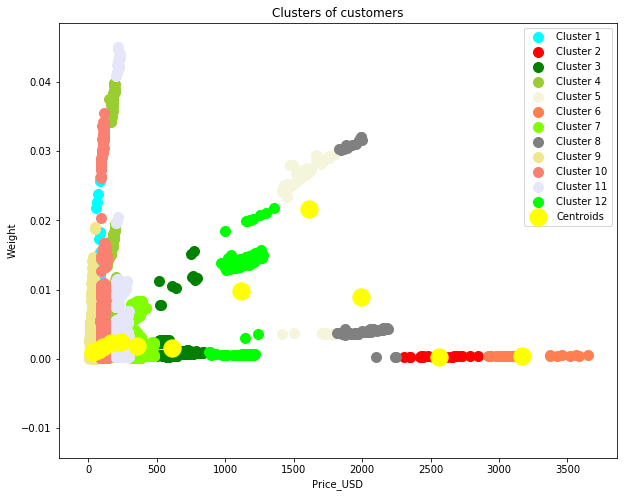

In [11]:
Colormap = ['aqua', 'red', 'green', 'yellowgreen', 'beige', 'coral',
            'chartreuse', 'grey', 'khaki', 'salmon', 'lavender', 'lime']
plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = Colormap[0], label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = Colormap[1], label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = Colormap[2], label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = Colormap[3], label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = Colormap[4], label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = Colormap[5], label = 'Cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 100, c = Colormap[6], label = 'Cluster 7')
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 100, c = Colormap[7], label = 'Cluster 8')
plt.scatter(X[y_kmeans == 8, 0], X[y_kmeans == 8, 1], s = 100, c = Colormap[8], label = 'Cluster 9')
plt.scatter(X[y_kmeans == 9, 0], X[y_kmeans == 9, 1], s = 100, c = Colormap[9], label = 'Cluster 10')
plt.scatter(X[y_kmeans == 10, 0], X[y_kmeans == 10, 1], s = 100, c = Colormap[10], label = 'Cluster 11')
plt.scatter(X[y_kmeans == 11, 0], X[y_kmeans == 11, 1], s = 100, c = Colormap[11], label = 'Cluster 12')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Price_USD')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [25]:
import math
def euclidean(x1, x2):
    assert(len(x1) == len(x2))
    distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(x1, x2)]))
    return distance

In [26]:
all_distances = []
for i, center_cordinates in enumerate(kmeans.cluster_centers_):
    distances = []
    for x_coord, y_coord in zip(X[y_kmeans == i, 0], X[y_kmeans == i, 1]):
        distances.append(euclidean([x_coord, y_coord], center_cordinates))
    all_distances.append(distances)

In [36]:
# this are the indices of the largest distance in for cluster 0
np.argsort(all_distances[0])[-5:][::-1]

array([4070, 3018, 7363, 2853, 6160], dtype=int64)

In [41]:
# this are the values of the largest distance in for cluster 0
np.sort(all_distances[0])[-5:][::-1]

array([9701.87361101, 9700.77492965, 9691.23071276, 9681.87237177,
       9674.52581357])

In [3]:
# Try the same procedure using a variable called Sector from re-encoding/transforming GISC_Sector into numerical values from 0 to its total number of unique values and NTM_EP

In [56]:
# Remove missing data
irisdata = irisdata.dropna()

X = irisdata.iloc[:, [18, 13]].values

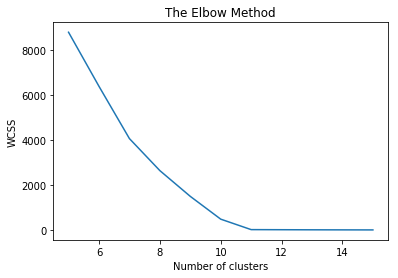

In [57]:
from sklearn.cluster import KMeans
wcss = []
for i in range(5, 16):
    kmeans = KMeans(n_clusters = i, random_state = 32)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(5, 16), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [58]:
kmeans = KMeans(n_clusters = 12, random_state = 32)
y_kmeans = kmeans.fit_predict(X)

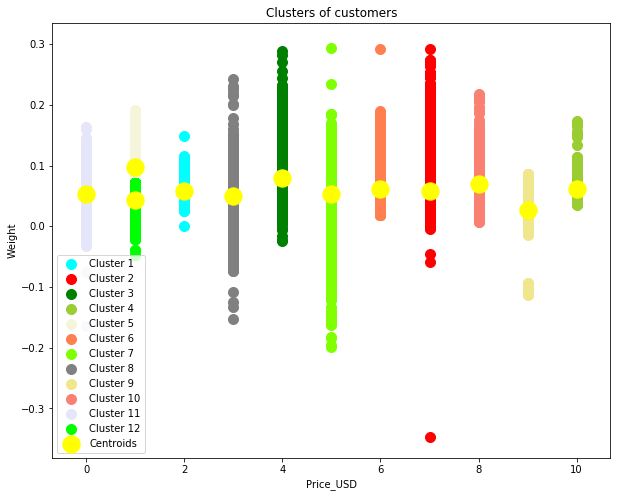

In [59]:
Colormap = ['aqua', 'red', 'green', 'yellowgreen', 'beige', 'coral',
            'chartreuse', 'grey', 'khaki', 'salmon', 'lavender', 'lime']
plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = Colormap[0], label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = Colormap[1], label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = Colormap[2], label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = Colormap[3], label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = Colormap[4], label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = Colormap[5], label = 'Cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 100, c = Colormap[6], label = 'Cluster 7')
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 100, c = Colormap[7], label = 'Cluster 8')
plt.scatter(X[y_kmeans == 8, 0], X[y_kmeans == 8, 1], s = 100, c = Colormap[8], label = 'Cluster 9')
plt.scatter(X[y_kmeans == 9, 0], X[y_kmeans == 9, 1], s = 100, c = Colormap[9], label = 'Cluster 10')
plt.scatter(X[y_kmeans == 10, 0], X[y_kmeans == 10, 1], s = 100, c = Colormap[10], label = 'Cluster 11')
plt.scatter(X[y_kmeans == 11, 0], X[y_kmeans == 11, 1], s = 100, c = Colormap[11], label = 'Cluster 12')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Price_USD')
plt.ylabel('Weight')
plt.legend()
plt.show()

## Clustering Metric

In [ ]:
# From the first exercise, provide a silouhette sample plot and comment about it.

In [44]:
irisdata = irisdata.dropna()
X = irisdata.iloc[:, [11 ,12,13,14,15,16]].values

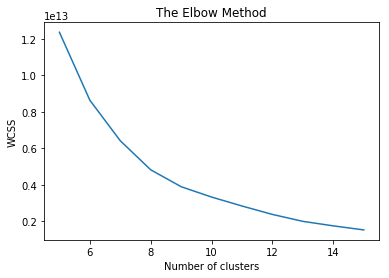

In [46]:
from sklearn.cluster import KMeans
wcss = []
for i in range(5, 16):
    kmeans = KMeans(n_clusters = i, random_state = 32)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(5, 16), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [47]:
kmeans = KMeans(n_clusters = 12, random_state = 32)
y_kmeans = kmeans.fit_predict(X)

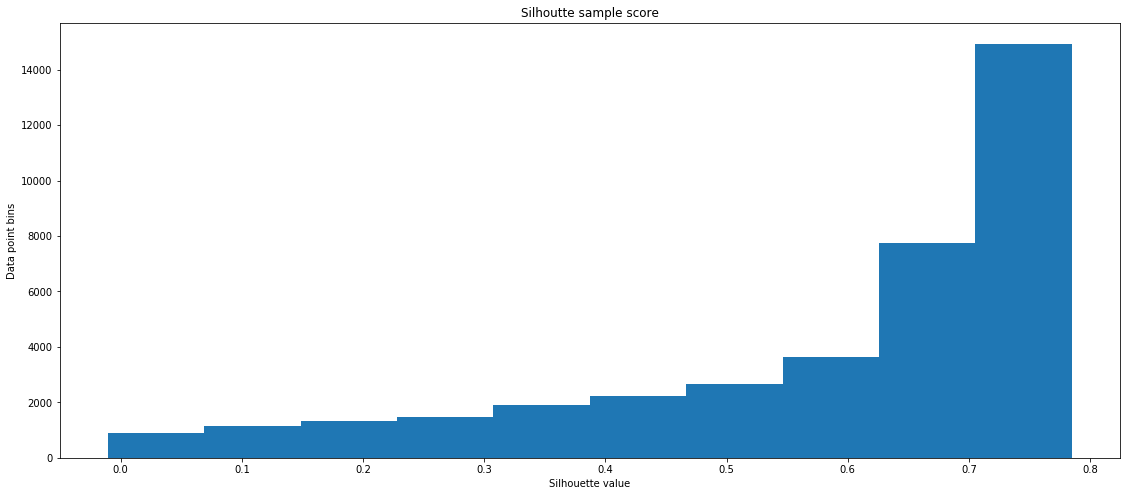

In [48]:
# visualize silhoutte sample scores
from sklearn.metrics import silhouette_samples

fig = plt.figure(figsize=(19, 8))
sample_score = silhouette_samples(X, y_kmeans)
plt.hist(sample_score)
plt.title("Silhoutte sample score")
plt.xlabel("Silhouette value")
plt.ylabel("Data point bins")
plt.show()

## Neural Networks

In [1]:
# Make an equivalent NN model for regression on the actual sales growth values using scikit-learn's MLPRegressor in a similar way as the example in the NN notebook
# Hint: Copy and run the notebook for neural networks first

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Location of dataset
url = 'http://bit.ly/PGGM_dataset'

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url)

In [81]:
# Remove missing data
irisdata = irisdata.dropna()

# Assign data from fifth column to 8th variable ()
X = irisdata.iloc[:, [7,16]]

# Assign data from our new numerical columns to y variable
y = irisdata["Universe_Returns_F4W"] 

In [82]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42) 

In [84]:
from sklearn.preprocessing import StandardScaler  

sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train.values.reshape(-1, 1))

In [85]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(
    hidden_layer_sizes=(50,3),
    activation='logistic',
    solver='sgd',
    batch_size=32,
    learning_rate='adaptive',
    learning_rate_init=0.3,
    early_stopping=True,
    validation_fraction=0.2,
    verbose=10,
    random_state=42,
    max_iter=100
)
# from plot_learning_curve import plot_learning_curve
clf.fit(X_train, y_train)  

C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.36519963
Validation score: 0.309834
Iteration 2, loss = 0.35240631
Validation score: 0.306344
Iteration 3, loss = 0.34986357
Validation score: 0.180216
Iteration 4, loss = 0.34937542
Validation score: 0.265354
Iteration 5, loss = 0.34884965
Validation score: 0.325476
Iteration 6, loss = 0.34860891
Validation score: 0.249542
Iteration 7, loss = 0.34583602
Validation score: 0.325365
Iteration 8, loss = 0.34514545
Validation score: 0.297278
Iteration 9, loss = 0.34574008
Validation score: 0.307939
Iteration 10, loss = 0.34417508
Validation score: 0.280100
Iteration 11, loss = 0.34389025
Validation score: 0.315491
Iteration 12, loss = 0.34295109
Validation score: 0.282555
Iteration 13, loss = 0.34365228
Validation score: 0.245974
Iteration 14, loss = 0.34204843
Validation score: 0.264663
Iteration 15, loss = 0.34327201
Validation score: 0.319496
Iteration 16, loss = 0.34343233
Validation score: 0.321106
Validation score did not improve more than tol=0.000100 for 10 co

C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='logistic', alpha=0.0001, batch_size=32, beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(50, 3), learning_rate='adaptive',
       learning_rate_init=0.3, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.2, verbose=10, warm_start=False)

In [86]:
predictions = clf.predict(X_test)  

In [87]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,predictions))
print("Test set score: %.3f" % clf.score(X_test, y_test))

44.45064270714715
Test set score: 0.203


## General

**Describe the main principles of the following terms in short and concise words :**
- unsupervised learning
- supervised learning
- inputs/features/predictors/independent variables
- outcome/response/dependent variables
- quantitative variable
- qualitative/categorical variable
- classification
- regression
- training data
- test data
- prediction
- inference
- parametric models
- non-parametric models

**Why do we need model validation?**

**What is your current opinion on the statement that machine learning and AI is or will soon be ready to overtake humans given all you now know about how it is done?**

$$\hat{Y} = \hat{f}(X)$$

**Supervised learning**

The training data has outcome labels(Y) for the inputs(X) for data science.

**Unsupervised learning**

The training data consists only of inputs(X) which makes us only be able to explore possible internals structures in the data.

**Inputs/features/predictors/independent variables**

The variables used by data science techniques to estimate its relationship with respect to some outcome or learn from.

**Outcome/response/dependent variables**

The output variable that we want to predict of learn how it is affected by so other variables.

**Quantitative variable**

Real valued variable

**Qualitative/categorical variable**

discrete and finite usuallyy non-numerical valued variable

**Classification**

The outcome variable(Y) for suprvised learning is categorical.

**Regression**

The outcome variable(Y) for suprvised learning is quantitative.

**Training data**

observed set of different data points using for data science (to estimate f).

**Test data**

A subset of the total training data put aside and not used directly to train a model for validation of the model.

**Prediction**

In many situations, a set of inputs X are readily available, but the output
Y cannot be easily obtained. In this setting, since the error term averages
to zero. In essence we are more interesdeted in detrmining the value of Y for any inputs we encounter.

**Inference**

We are often interested in understanding the way that Y is affected as
X change. In this situation we wish to estimate f, but our goal is
not necessarily to make predictions for Y . We instead want to understand
the relationship between X and Y , or more specifically, to understand how
Y changes as a function of X

**Parametric models**

we make an assumption about the functional form of the relationship(f) between the input and outcome (e.g f is linear), then we estimate the parameters of the assumed function to fit to the training data.

**Non parametric models**

Non-parametric models do not make explicit assumptions about the functional
form of f. Instead they seek an estimate of f that gets as close to the
data points as possible without being too rough or wiggly.


##### We need model validation to ensure our estimated function can generalize to unseen inputs which is what the model will encounter in a real life scenario of application of a model.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics.regression import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

In [32]:
h = .02  # step size in the mesh

def kpca_transformed(X, y, kernel_name, gamma):
    kpca = KernelPCA(n_components=2, kernel=kernel_name, gamma=gamma)
    
    X_transformed = kpca.fit_transform(X)
    return X, X_transformed, y

In [33]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# iterate over datasets
def plot_svm_classification(X, y, C, title, kernel):
    svc = SVC(kernel=kernel, C=C)
    
    # preprocess dataset, split into training and test part
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    #ax = plt.subplot()
    svc.fit(X_train, y_train)
    score = svc.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)
    plt.title(
      '{} \n$C$: {}\n Score \n Train:{}% Test:{}%'
        .format(
          title,
          C,
          round(100 * svc.score(X_train, y_train), 2),
          round(100 * score, 2),
      fontsize=20))

In [34]:
def plot_transformed(X, y, kernel_name, gamma, C, kernel_svc='linear'):
    X, X_transformed, y = kpca_transformed(X, y, kernel_name, gamma)
    
    X = StandardScaler().fit_transform(X)
    figure = plt.figure(figsize=(18, 16))
    plt.subplot(221)
    plot_svm_classification(X, y, C, title='Original', kernel=kernel_svc)

    plt.subplot(222)
    plot_svm_classification(X_transformed, y, C, title='KPCA with $\gamma$={}'.format(gamma), kernel=kernel_svc)
    plt.show()

In [35]:
# Load the pggm dataset
pggm = pd.read_csv('http://bit.ly/PGGM_dataset')

In [36]:
pggm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38304 entries, 0 to 38303
Data columns (total 18 columns):
Identifier               38304 non-null object
Name                     38304 non-null object
Period                   38304 non-null object
Period_YYYYMMDD          38304 non-null int64
Ticker                   38304 non-null object
Universe_Returns_F1W     38300 non-null float64
Universe_Returns_F4W     38296 non-null float64
Universe_Returns_F12W    38268 non-null float64
Weight                   38304 non-null float64
GICS_Sector              38304 non-null object
GICS_Ind_Grp             38304 non-null object
Market_Cap_USD           38304 non-null float64
Price_USD                38304 non-null float64
NTM_EP                   38246 non-null float64
LTM_ROA                  38245 non-null float64
BP                       38288 non-null float64
LTM_EP                   38215 non-null float64
5Y_Sales_Growth          38197 non-null float64
dtypes: float64(11), int64(1), obje

In [37]:
# Remove missing data
pggm = pggm.dropna()

In [38]:
import numpy as np
pggm['Universe_Returns_F4W_cat'] = np.where(pggm['Universe_Returns_F4W']>=0, 1, -1)

In [39]:
pggm.head()

,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,GICS_Ind_Grp,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth,Universe_Returns_F4W_cat
0,17290810,Cintas Corporation,12/31/2014,20141231,CTAS-US,-2.517855,-0.121111,4.156041,0.000402,Industrials,Commercial & Professional Services,7761.120,78.44,0.044387,9.089989,0.246962,0.042708,4.718765,-1
1,80589M10,SCANA Corporation,12/31/2014,20141231,SCG-US,2.036428,6.307948,-8.426744,0.000422,Utilities,Utilities,8151.001,60.40,0.061397,3.472852,0.572871,0.062748,-0.949881,1
2,50241310,L-3 Communications Holdings Inc.,12/31/2014,20141231,LLL-US,-0.396162,-1.283580,-0.753021,0.000563,Industrials,Capital Goods,10883.341,126.21,0.060554,4.744629,0.570099,0.059821,-4.316938,-1
3,91301710,United Technologies Corporation,12/31/2014,20141231,UTX-US,-1.973909,1.669562,1.815629,0.005174,Industrials,Capital Goods,99942.990,115.00,0.062889,6.805052,0.325584,0.059088,3.083364,1
4,92939U10,Wisconsin Energy Corporation,12/31/2014,20141231,WEC-US,1.118696,7.679176,-6.160975,0.000616,Utilities,Utilities,11893.872,52.74,0.051359,4.201019,0.369798,0.050815,1.421392,1


In [40]:
X = pggm.iloc[:, [7,16]]
y = pggm.iloc[:, 18]  

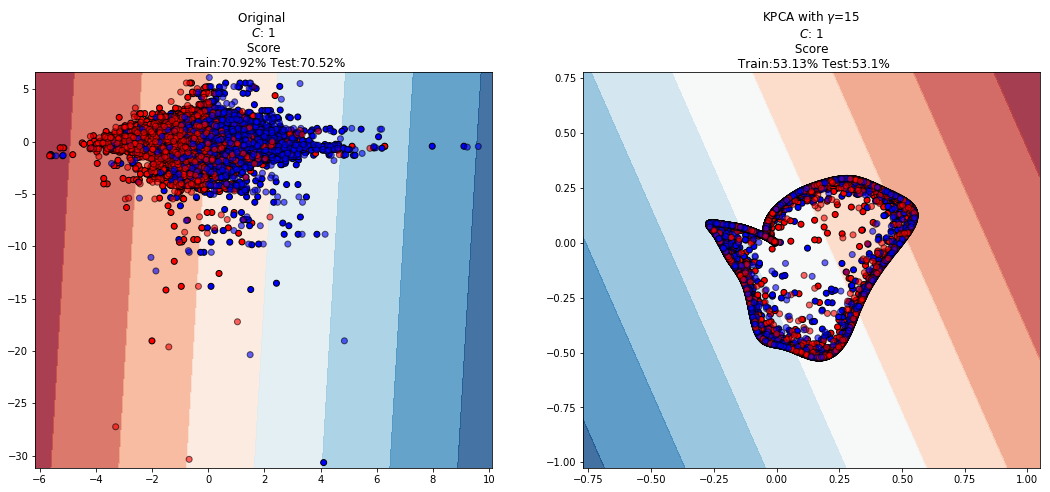

In [70]:
plot_transformed(X, y, 'rbf', 15, 1)

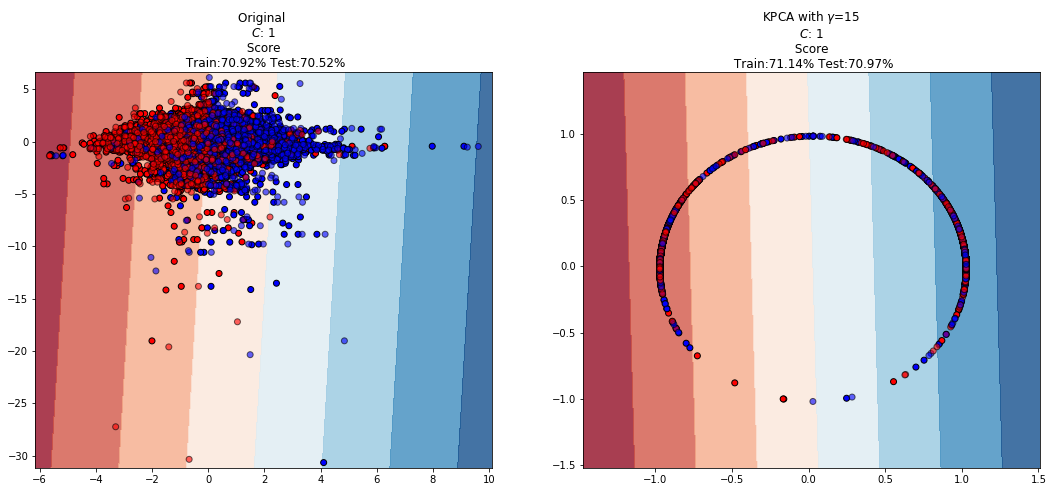

In [77]:
plot_transformed(X, y, 'cosine', 15, 1)

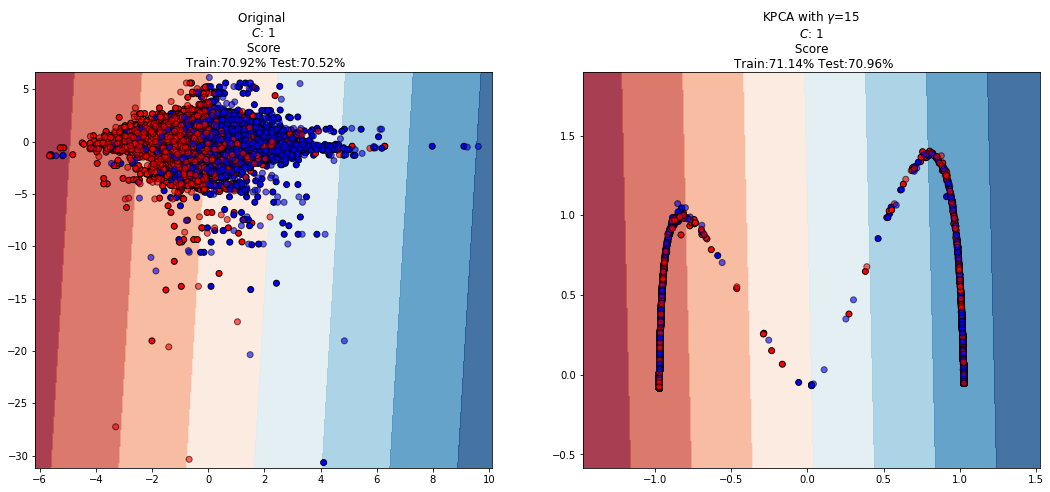

In [78]:
plot_transformed(X, y, 'sigmoid', 15, 1)